<h2><b>[개인 과제]</b></h2>

````
# 미국 Boston 지역의 집값 data 불러오기
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()
````


<h3>Ridge, Lasso, ElasticNet을 사용해 alpha의 값 변화에 따른 MEDV를 예측하는 변수들의 계수 변화를 시각화해보세요.</h3>

[<h3>참고 코드</h3>](https://datascienceschool.net/03%20machine%20learning/06.05%20%EC%A0%95%EA%B7%9C%ED%99%94%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.html)



<br>

**<h3><조건></h3>**

<h3>1. X(독립변수 data)에 Standard Scaler 적용하기 </h3>

<br>

**<h3><참고></h3>**

<h3>Ridge와 Lasso에서 상수항이 축소되지 않는 이유</h3>

[<h3>참고 블로그</h3>](https://rpago.tistory.com/59)


In [2]:
# The normal imports
import numpy as np # efficient numerical computations
import pandas as pd # data structures for data analysis
from numpy.random import randn

# These are the plotting modules adn libraries
import matplotlib as mpl # plotting (both interactive and to files)
import matplotlib.pyplot as plt
import seaborn as sns # extra plot types, elegant and readable plot style

# machine learning algorithms, dataset access
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, RANSACRegressor, ElasticNet, Ridge, Lasso

sns.set_style('whitegrid')

# Command so that plots appear in the iPython Notebook
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
# 미국 Boston 지역의 집값 data 불러오기
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# 독립 변수, 종속 변수 지정
house_column=house.columns.to_list()
X = house[house_column[0:-1]]
y = house['MEDV']
# 정규화(전체 dataset에 대해 Scaling 진행.)
scaler=StandardScaler()
X_s=scaler.fit_transform(X)


In [5]:
# alpha 값에 따른 계수 변화(Ridge)
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    ridge = Lasso(alpha=a).fit(X_s, y)
    data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge

,0.001,0.010,0.100,1.000,10.000
0,-0.925348,-0.900245,-0.632304,-0.000000,-0.0
1,1.076739,1.035916,0.708409,0.000000,0.0
2,0.131471,0.046924,-0.000000,-0.000000,-0.0
3,0.682060,0.684152,0.657607,0.000000,0.0
4,-2.048349,-1.980551,-1.574193,-0.000000,-0.0
5,2.675950,2.687312,2.826269,2.713355,0.0
6,0.015049,0.000000,-0.000000,-0.000000,-0.0
7,-3.100300,-3.058301,-2.422079,-0.000000,0.0
8,2.643836,2.481844,1.195937,-0.000000,-0.0
9,-2.058853,-1.899442,-0.846468,-0.000000,-0.0


In [6]:
# alpha 값에 따른 계수 변화(Lasso)
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(X_s, y)
    data.append(pd.Series(np.hstack([lasso.coef_])))

df_Lasso = pd.DataFrame(data, index=alpha).T
df_Lasso

,0.001,0.010,0.100,1.000,10.000
0,-0.925348,-0.900245,-0.632304,-0.000000,-0.0
1,1.076739,1.035916,0.708409,0.000000,0.0
2,0.131471,0.046924,-0.000000,-0.000000,-0.0
3,0.682060,0.684152,0.657607,0.000000,0.0
4,-2.048349,-1.980551,-1.574193,-0.000000,-0.0
5,2.675950,2.687312,2.826269,2.713355,0.0
6,0.015049,0.000000,-0.000000,-0.000000,-0.0
7,-3.100300,-3.058301,-2.422079,-0.000000,0.0
8,2.643836,2.481844,1.195937,-0.000000,-0.0
9,-2.058853,-1.899442,-0.846468,-0.000000,-0.0


In [7]:
# alpha 값에 따른 계수 변화(ElasticNet)
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    elastic = ElasticNet(alpha=a).fit(X_s, y)
    data.append(pd.Series(np.hstack([elastic.coef_])))

df_Elastic = pd.DataFrame(data, index=alpha).T
df_Elastic

,0.001,0.010,0.100,1.000,10.000
0,-0.924623,-0.894540,-0.681235,-0.341208,-0.000000
1,1.075275,1.023353,0.706879,0.079249,0.000000
2,0.130139,0.039875,-0.186480,-0.262560,-0.000000
3,0.682773,0.690611,0.701296,0.402538,0.000000
4,-2.045455,-1.953072,-1.390941,-0.239884,-0.000000
5,2.677286,2.700069,2.829834,2.361406,0.203314
6,0.015638,-0.000000,-0.000551,-0.000000,-0.000000
7,-3.095364,-3.013315,-2.251823,-0.000000,0.000000
8,2.634842,2.407525,1.152858,-0.000000,-0.000000
9,-2.050743,-1.835635,-0.829052,-0.312061,-0.000000


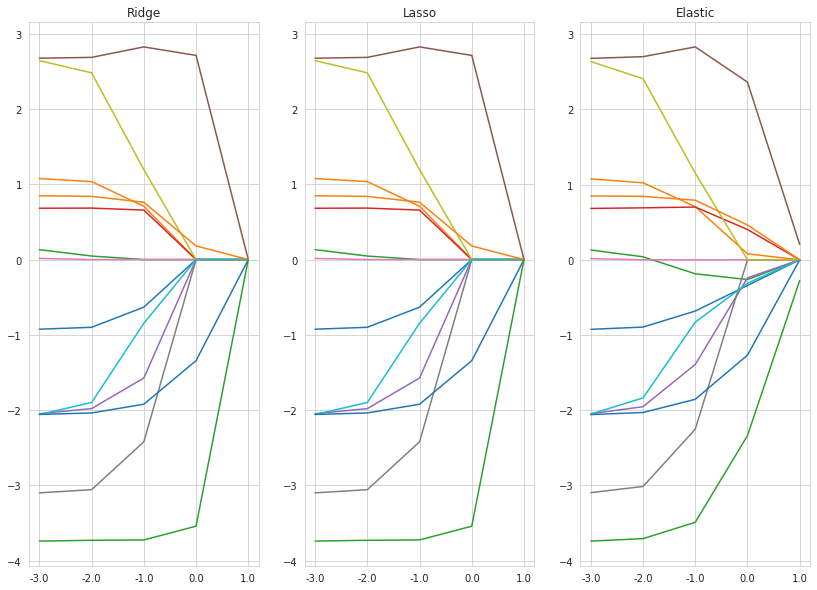

In [8]:
# 시각화
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(1,3,1)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Ridge")

ax2 = plt.subplot(1,3,2)
plt.semilogx(df_Lasso.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Lasso")

ax3= plt.subplot(1,3,3)
plt.semilogx(df_Elastic.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Elastic")
plt.show()
